In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [231]:
import warnings

In [232]:
warnings.filterwarnings("ignore")

In [101]:
from sklearn.linear_model import LogisticRegression

In [3]:
train_v2 = pd.read_csv("C:/Users/Nandita/KKBox/train_v2.csv/data/churn_comp_refresh/train_v2.csv")

In [4]:
transactions_v2 = pd.read_csv("C:/Users/Nandita/KKBox/transactions_v2.csv/data/churn_comp_refresh/transactions_v2.csv")

In [5]:
user_logs = pd.read_csv("C:/Users/Nandita/KKBox/user_logs_v2.csv/data/churn_comp_refresh/user_logs_v2.csv")

In [6]:
members = pd.read_csv("C:/Users/Nandita/KKBox/members_v3.csv/members_v3.csv")

In [7]:
def df_shape(df, name="DataFrame"):
    print(f"{name}: {df.shape}")

In [8]:
df_shape(train_v2)

DataFrame: (970960, 2)


In [9]:
df_shape(transactions_v2)

DataFrame: (1431009, 9)


In [10]:
df_shape(user_logs)

DataFrame: (18396362, 9)


In [11]:
df_shape(members)

DataFrame: (6769473, 6)


In [12]:
train_v2.head()

,msno,is_churn
0,ugx0CjOMzazClkFzU2xasmDZaoIqOUAZPsH1q0teWCg=,1
1,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1
2,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1
3,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1
4,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1


In [13]:
transactions_v2.head()

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
0,++6eU4LsQ3UQ20ILS7d99XK8WbiVgbyYL4FUgzZR134=,32,90,298,298,0,20170131,20170504,0
1,++lvGPJOinuin/8esghpnqdljm6NXS8m8Zwchc7gOeA=,41,30,149,149,1,20150809,20190412,0
2,+/GXNtXWQVfKrEDqYAzcSw2xSPYMKWNj22m+5XkVQZc=,36,30,180,180,1,20170303,20170422,0
3,+/w1UrZwyka4C9oNH3+Q8fUf3fD8R3EwWrx57ODIsqk=,36,30,180,180,1,20170329,20170331,1
4,+00PGzKTYqtnb65mPKPyeHXcZEwqiEzktpQksaaSC3c=,41,30,99,99,1,20170323,20170423,0


In [14]:
user_logs.head()

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [15]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915


In [16]:
transactions_v2[transactions_v2['msno'] == 'EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=']

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
1246772,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,41,30,99,99,1,20170323,20170423,0


In [17]:
train_v2['msno'].nunique()

970960

In [147]:
transactions_v2['msno'].nunique()

1197050

In [19]:
transactions_v2['msno'].value_counts()

msno
72gJqt1O31E/WoxAEYFn9LHNI6mAZFGera5Q6gvsFkA=    208
5ty4nZkq54z93wQtBN7RHVYj8rNghBDCVBH+3xmxf0I=    172
OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=    148
WHsCtkOVsauvqBL0ULuG38887y7aU8GXdCmJMjw6hjQ=    145
SNlFRAsmUqnXKPofSXA8WYUc5DtmLcUMy4pXSJ3Ohz0=    131
                                               ... 
+7zLPU/exjuHkWgWbPZlaTiISTa4wIz4JdSjrj09/HQ=      1
+80beh2T6i0UctXvcbhoGWaxqAWE0KMnACtHDItZvpU=      1
+84v5bP7WnUv89mJ4xODq4Elcze7B3ngzpePGNzd3+M=      1
wm5QBy6T2XH84LzWZ1+7BhCyCiWaDD62VIUFbNp9UYE=      1
+0W3Q9FSw8TLgoNke9JFl6dUeoxAOfuHarEexRPcJsA=      1
Name: count, Length: 1197050, dtype: int64

In [20]:
transactions_v2[transactions_v2['msno']=='OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=']

,msno,payment_method_id,payment_plan_days,plan_list_price,actual_amount_paid,is_auto_renew,transaction_date,membership_expire_date,is_cancel
9999,OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=,38,7,0,0,0,20161031,20171028,0
10000,OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=,38,7,0,0,0,20161031,20190420,0
10001,OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=,38,7,0,0,0,20161031,20190427,0
17143,OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=,38,7,0,0,0,20161031,20171209,0
31451,OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=,38,7,0,0,0,20161031,20190608,0
...,...,...,...,...,...,...,...,...,...
1412513,OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=,38,7,0,0,0,20160813,20170701,0
1419619,OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=,38,7,0,0,0,20160813,20170617,0
1419620,OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=,38,7,0,0,0,20161031,20181215,0
1426809,OGKDrZQDB3yewZhoSd5qqvmG5A1GcNTYMexO95NlH+g=,38,7,0,0,0,20161031,20190202,0


In [21]:
user_logs['msno'].nunique()

1103894

In [24]:
user_logs['msno'].value_counts()

msno
b74Xot5HcOL8YQGiuwLw+Cm7RyGV2fOkGczJomGLocg=    31
vg16qtAlmVzBB8Ro/Nw4ufokUufkmiPWD+lfYXv5gwA=    31
u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=    31
PaVUCAJf0q9Nk+UJP/cIwe5p8GkaiPIHO6rwMJAEGBE=    31
i7fqKDFXkrheRQ+PTKw3jErC2epEF6ZTRbTWvyy69ys=    31
                                                ..
V3P48TzUSFSFhJ8vrnE5SmphdmFx4zSgrU5Otelb2/o=     1
dcbbkigmeuyHFeJCCUxXY/kwbKMax/0CLemuwJu87Pg=     1
//1Lq5SYI3V0rInzVFqUEdAXXxvM7o6E5myFDpT5rTc=     1
0s5BsoimuJTfJuqOfPZ+QVSl+7GKc4OR2eZY0Ic/Vm0=     1
SIaH7szBWJf7vp3TCAjabNY5IDLaSaycNe8L1QPq48k=     1
Name: count, Length: 1103894, dtype: int64

In [25]:
members['msno'].value_counts()

msno
Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=    1
+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=    1
cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=    1
9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=    1
WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=    1
                                               ..
VSGkb3hyBRUtb/b1MQUZbvOkktS3vKLnhMHW0CF8eyU=    1
nWjH7glPkZ7jOVaCRwwjlpmp0T1hSWdv8hMJxiWCwKc=    1
GH+b5+1tlv7ZZXsA8upBzVXMTLyffKcsF7WoU8b5rOI=    1
XVlwT3fdCFGKqerEKBzUIjK+jzI6jzSke4cDMVhYyjE=    1
isBt+JlgvZRNy6lxVr5vvuJ4lD00ofTaKyJ+uRnGcPg=    1
Name: count, Length: 6769473, dtype: int64

In [158]:
transactions_agg = transactions_v2.groupby('msno').agg(
    payment_plan_days_mean=('payment_plan_days', 'mean'),  
    payment_plan_days_max=('payment_plan_days', 'max'),    
    plan_list_price_mean=('plan_list_price', 'mean'),      
    actual_amount_paid_sum=('actual_amount_paid', 'sum'),  
    is_auto_renew_mean=('is_auto_renew', 'mean'),          
    is_cancel_mean=('is_cancel', 'mean')                   
).reset_index()

In [159]:
transactions_agg.head()

,msno,payment_plan_days_mean,payment_plan_days_max,plan_list_price_mean,actual_amount_paid_sum,is_auto_renew_mean,is_cancel_mean
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,395.0,395,1599.0,1599,0.0,0.0
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,30.0,30,99.0,99,1.0,0.0
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,30.0,30,149.0,298,1.0,0.0
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,30.0,30,149.0,149,1.0,0.0
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,30.0,30,149.0,149,1.0,0.0


In [160]:
mask = transactions_agg['payment_plan_days_mean'] != transactions_agg['payment_plan_days_max']

transactions_agg[mask]

,msno,payment_plan_days_mean,payment_plan_days_max,plan_list_price_mean,actual_amount_paid_sum,is_auto_renew_mean,is_cancel_mean
99,++NdP5GS9hxpyOaig+eMIWJ1gw8VmC85qTsEG5YMs+w=,385.0,410,1494.0,2988,0.000000,0.0
125,++VJ+Lla5fcEpsJWCHx7i7x7LBdGkBiFTz3oBH3THOc=,300.0,360,1200.0,2400,0.000000,0.0
142,++Z7/94w4+ZvUIgyOWeMzefNr1EYmXfOg86g23FKgPo=,170.0,240,460.0,1380,0.000000,0.0
192,++jBVxyDBQXJ9ykE/NhDM5t/4Lo4v0IRxqNXMPLCFE0=,101.0,195,447.0,894,0.000000,0.0
203,++lJ3R8mLL7PpfIFAuQjx2J3le8JJ4Sk3RrgBX54qOk=,48.5,90,238.5,477,0.000000,0.0
...,...,...,...,...,...,...,...
1196831,zzBnipQsAp1Ryo6Dsj0RK3KAzRAIYmmBrCvoekz0ZyA=,75.0,90,300.0,600,0.000000,0.0
1196946,zzeFxWafyReztil+10cmNEdlD4tEXUSt9+/zZZuUMls=,300.0,360,1200.0,2400,0.000000,0.0
1197004,zzoDlpMVa28r4EW18mzyEFDu/c/swxxeMPGLTinccc4=,300.0,360,1200.0,2400,0.000000,0.0
1197005,zzoaEw67A/0C1+4/RgRCBOVK+zsL1xJTMJMTdF42FxM=,80.0,180,278.0,834,0.666667,0.0


In [161]:
train_transaction = pd.merge(train_v2,transactions_agg,on='msno',how='inner')

In [162]:
train_transaction.head()

,msno,is_churn,payment_plan_days_mean,payment_plan_days_max,plan_list_price_mean,actual_amount_paid_sum,is_auto_renew_mean,is_cancel_mean
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,30.0,30,180.0,180,0.0,0.000
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,75.0,90,150.0,300,0.0,0.000
2,8iF/+8HY8lJKFrTc7iR9ZYGCG2Ecrogbc2Vy5YhsfhQ=,1,30.0,30,149.0,1490,1.0,0.000
3,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,30.0,30,99.0,792,1.0,0.125
4,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,30.0,30,149.0,149,1.0,1.000


In [163]:
user_logs_agg = user_logs.groupby('msno').agg({
    'date': 'nunique',     
    'num_25': 'sum',
    'num_50': 'sum',
    'num_75': 'sum',
    'num_985': 'sum',
    'num_100' : 'sum',
    'num_unq':'sum',
    'total_secs':'sum'
})

In [164]:
user_logs_agg.head()

,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
msno,,,,,,,,
+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,26,86,11,10,5,472,530,117907.425
+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,31,191,90,75,144,589,885,192527.892
+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,28,43,12,15,12,485,468,115411.260
+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,21,207,163,100,64,436,828,149896.558
++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,29,105,24,39,35,479,230,116433.247


In [165]:
user_main = pd.merge(train_transaction,user_logs_agg,on='msno',how='inner')

In [166]:
user_main.head()

,msno,is_churn,payment_plan_days_mean,payment_plan_days_max,plan_list_price_mean,actual_amount_paid_sum,is_auto_renew_mean,is_cancel_mean,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,30.0,30,180.0,180,0.0,0.000,6,0,4,2,0,26,30,6986.509
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,75.0,90,150.0,300,0.0,0.000,20,239,57,32,22,205,432,67810.467
2,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,30.0,30,99.0,792,1.0,0.125,15,9,7,4,4,962,548,239882.241
3,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,30.0,30,149.0,149,1.0,1.000,4,6,1,1,4,37,48,10110.665
4,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,410.0,410,1788.0,1788,0.0,0.000,31,78,20,30,16,1023,758,290831.795


In [167]:
user_main_members = pd.merge(user_main,members,on='msno',how='inner')

In [168]:
user_main_members.head()

,msno,is_churn,payment_plan_days_mean,payment_plan_days_max,plan_list_price_mean,actual_amount_paid_sum,is_auto_renew_mean,is_cancel_mean,date,num_25,...,num_75,num_985,num_100,num_unq,total_secs,city,bd,gender,registered_via,registration_init_time
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,30.0,30,180.0,180,0.0,0.000,6,0,...,2,0,26,30,6986.509,13,20,male,3,20131223
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,75.0,90,150.0,300,0.0,0.000,20,239,...,32,22,205,432,67810.467,13,18,male,3,20131227
2,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,30.0,30,99.0,792,1.0,0.125,15,9,...,4,4,962,548,239882.241,13,35,female,7,20140125
3,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,30.0,30,149.0,149,1.0,1.000,4,6,...,1,4,37,48,10110.665,22,0,NaN,3,20140126
4,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,410.0,410,1788.0,1788,0.0,0.000,31,78,...,30,16,1023,758,290831.795,9,28,female,3,20140202


In [169]:
df_shape(user_main_members)

DataFrame: (725722, 21)


In [170]:
user_main_members['msno'].nunique()

725722

In [174]:
user_main_members.columns

Index(['msno', 'is_churn', 'payment_plan_days_mean', 'payment_plan_days_max',
       'plan_list_price_mean', 'actual_amount_paid_sum', 'is_auto_renew_mean',
       'is_cancel_mean', 'date', 'num_25', 'num_50', 'num_75', 'num_985',
       'num_100', 'num_unq', 'total_secs', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time'],
      dtype='object')

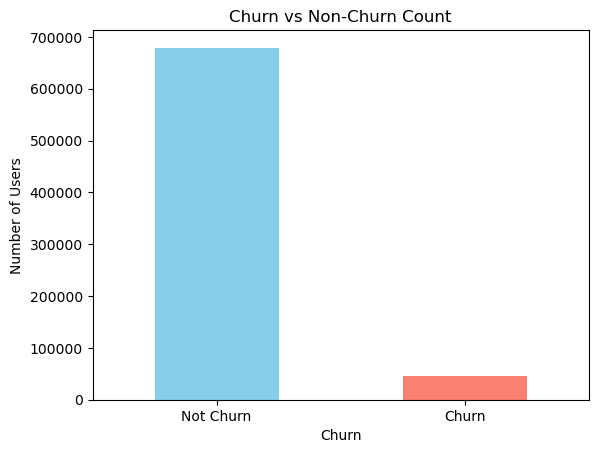

In [171]:
user_main_members['is_churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn vs Non-Churn Count')
plt.xlabel('Churn')
plt.ylabel('Number of Users')
plt.xticks([0,1], ['Not Churn', 'Churn'], rotation=0)
plt.show()

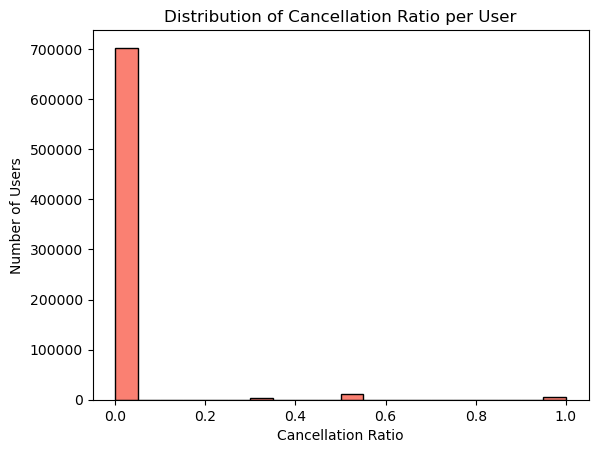

In [177]:
plt.hist(user_main_members['is_cancel_mean'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Cancellation Ratio per User')
plt.xlabel('Cancellation Ratio')
plt.ylabel('Number of Users')
plt.show()

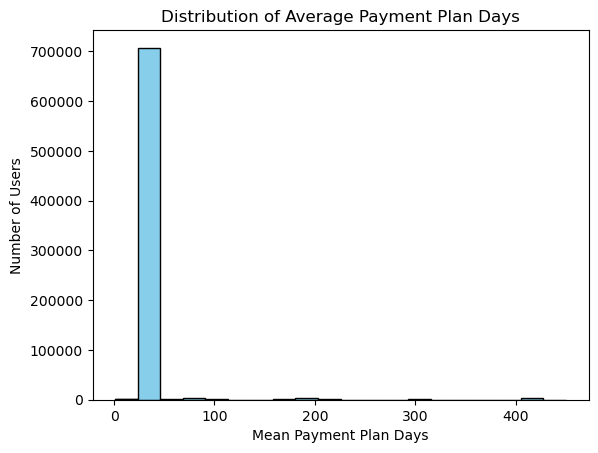

In [186]:
plt.hist(user_main_members['payment_plan_days_mean'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Payment Plan Days')
plt.xlabel('Mean Payment Plan Days')
plt.ylabel('Number of Users')
plt.show()

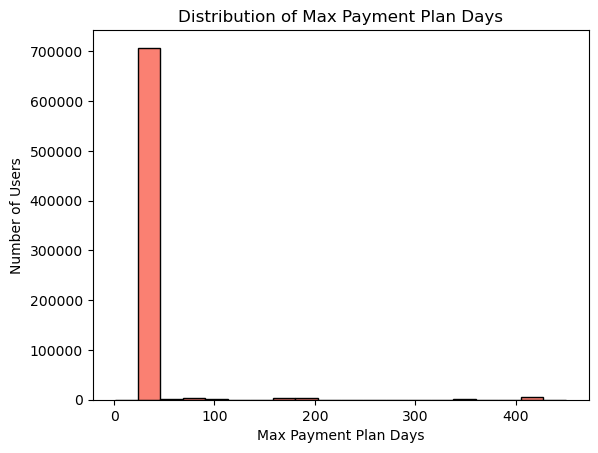

In [187]:
plt.hist(user_main_members['payment_plan_days_max'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Max Payment Plan Days')
plt.xlabel('Max Payment Plan Days')
plt.ylabel('Number of Users')
plt.show()

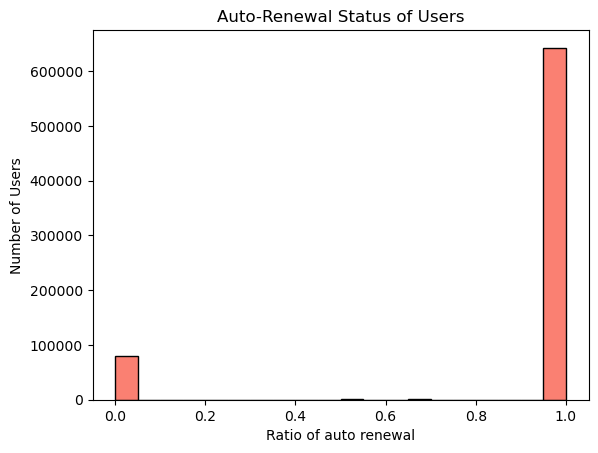

In [190]:
plt.hist(user_main_members['is_auto_renew_mean'], bins=20, color='salmon', edgecolor='black')
plt.title('Auto-Renewal Status of Users')
plt.xlabel('Ratio of auto renewal')
plt.ylabel('Number of Users')
plt.show()

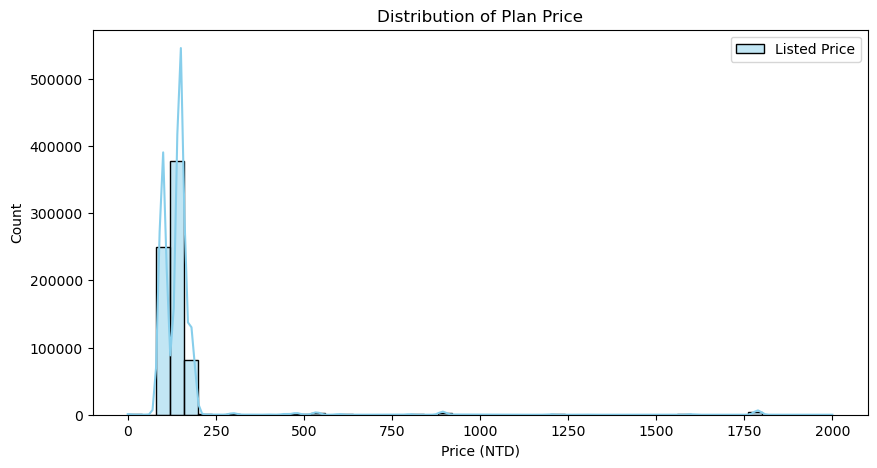

In [191]:
plt.figure(figsize=(10,5))
sns.histplot(user_main_members['plan_list_price_mean'], bins=50, color='skyblue', label='Listed Price', kde=True)
plt.legend()
plt.title("Distribution of Plan Price")
plt.xlabel("Price (NTD)")
plt.ylabel("Count")
plt.show()

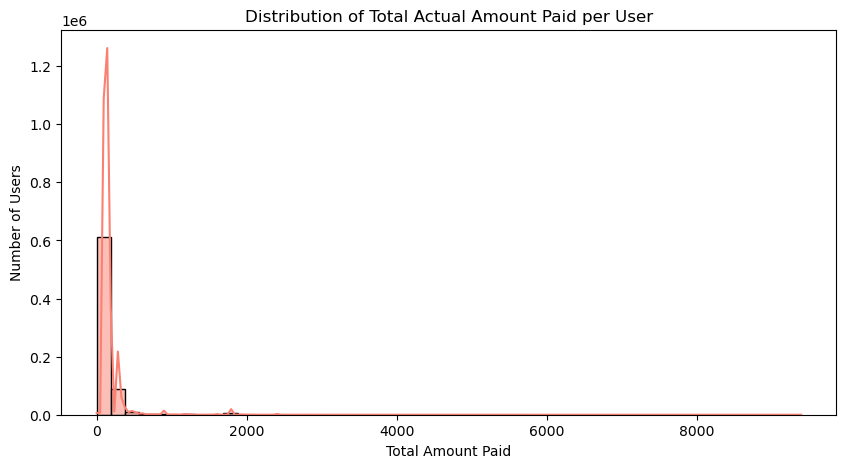

In [192]:
plt.figure(figsize=(10,5))
sns.histplot(user_main_members['actual_amount_paid_sum'], bins=50, color='salmon', kde=True)
plt.title("Distribution of Total Actual Amount Paid per User")
plt.xlabel("Total Amount Paid")
plt.ylabel("Number of Users")
plt.show()

In [193]:
user_main_members['city'].unique()

array([13, 22,  9,  1, 14,  4, 15, 18, 12,  3, 21,  6,  5,  8,  7, 17, 11,
       10, 16, 20, 19])

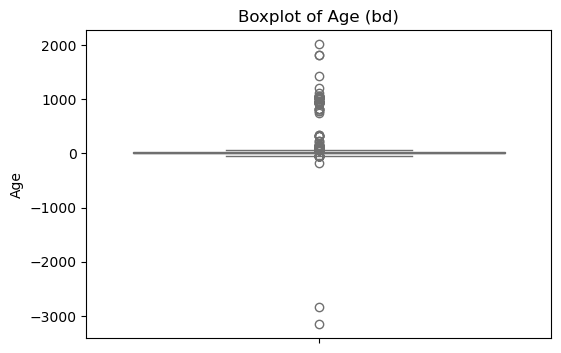

In [194]:
plt.figure(figsize=(6,4))
sns.boxplot(data=user_main_members, y='bd', color='skyblue')
plt.title("Boxplot of Age (bd)")
plt.ylabel("Age")
plt.show()

In [195]:
user_main_members['bd'].mean()

np.float64(14.205281085594759)

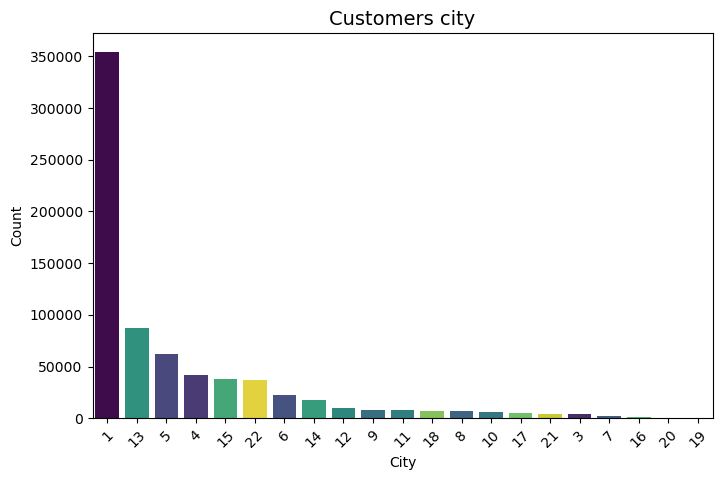

In [196]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=user_main_members,
    x='city',
    order=user_main_members['city'].value_counts().index,
    hue='city',        
    palette="viridis",
    legend=False                   
)

plt.title("Customers city", fontsize=14)
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [197]:
user_main_members['gender'].unique()

array(['male', 'female', nan], dtype=object)

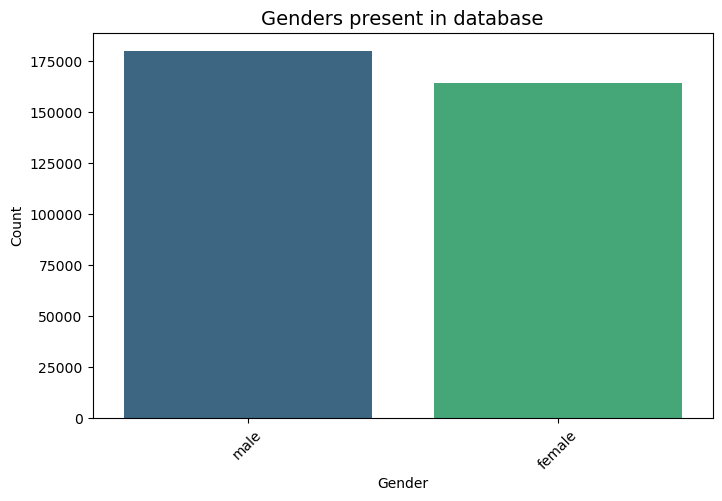

In [198]:
plt.figure(figsize=(8,5))
sns.countplot(
    data=user_main_members,
    x='gender',
    order=user_main_members['gender'].value_counts().index,
    hue='gender',        
    palette="viridis",
    legend=False                   
)

plt.title("Genders present in database", fontsize=14)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [200]:
user_main_members['gender'].value_counts(dropna=False)

gender
NaN       381807
male      179846
female    164069
Name: count, dtype: int64

In [201]:
user_main_members.isnull().sum()

msno                           0
is_churn                       0
payment_plan_days_mean         0
payment_plan_days_max          0
plan_list_price_mean           0
actual_amount_paid_sum         0
is_auto_renew_mean             0
is_cancel_mean                 0
date                           0
num_25                         0
num_50                         0
num_75                         0
num_985                        0
num_100                        0
num_unq                        0
total_secs                     0
city                           0
bd                             0
gender                    381807
registered_via                 0
registration_init_time         0
dtype: int64

In [202]:
def convert_to_datetime(df,column_name='transaction_date'):
    df[column_name] = pd.to_datetime(df[column_name],format='%Y%m%d')
    return df

In [204]:
convert_to_datetime(user_main_members,column_name='registration_init_time')

,msno,is_churn,payment_plan_days_mean,payment_plan_days_max,plan_list_price_mean,actual_amount_paid_sum,is_auto_renew_mean,is_cancel_mean,date,num_25,...,num_75,num_985,num_100,num_unq,total_secs,city,bd,gender,registered_via,registration_init_time
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,30.0,30,180.0,180,0.0,0.000,6,0,...,2,0,26,30,6986.509,13,20,male,3,2013-12-23
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,75.0,90,150.0,300,0.0,0.000,20,239,...,32,22,205,432,67810.467,13,18,male,3,2013-12-27
2,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,30.0,30,99.0,792,1.0,0.125,15,9,...,4,4,962,548,239882.241,13,35,female,7,2014-01-25
3,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,30.0,30,149.0,149,1.0,1.000,4,6,...,1,4,37,48,10110.665,22,0,NaN,3,2014-01-26
4,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,410.0,410,1788.0,1788,0.0,0.000,31,78,...,30,16,1023,758,290831.795,9,28,female,3,2014-02-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725717,eZ3y0lsY2SVZc2h8T3zB454TuBz6oVDMlFsEpEPQclQ=,0,30.0,30,99.0,99,1.0,0.000,31,171,...,13,45,901,572,238326.126,18,0,female,7,2011-08-30
725718,/QlhSIWEZelYnwttYJSQL50EJJ2yRV+ThQIVQLvctp8=,0,30.0,30,149.0,149,1.0,0.000,24,117,...,30,25,461,429,125205.826,8,25,female,7,2011-08-30
725719,OHnZbu+EVaP+vN7Z+OfT5OMcp90MWFZonmM0o3pb8FY=,0,30.0,30,149.0,149,1.0,0.000,24,48,...,4,9,318,291,77031.435,13,28,male,7,2011-08-31
725720,S92bDK//uI6hk3u1vuApro0qJBQOToBozZ7lL1yTC+w=,0,30.0,30,99.0,99,1.0,0.000,5,43,...,8,7,22,54,8697.066,1,0,NaN,7,2011-09-03


In [205]:
user_main_members.head()

,msno,is_churn,payment_plan_days_mean,payment_plan_days_max,plan_list_price_mean,actual_amount_paid_sum,is_auto_renew_mean,is_cancel_mean,date,num_25,...,num_75,num_985,num_100,num_unq,total_secs,city,bd,gender,registered_via,registration_init_time
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,30.0,30,180.0,180,0.0,0.000,6,0,...,2,0,26,30,6986.509,13,20,male,3,2013-12-23
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,75.0,90,150.0,300,0.0,0.000,20,239,...,32,22,205,432,67810.467,13,18,male,3,2013-12-27
2,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,30.0,30,99.0,792,1.0,0.125,15,9,...,4,4,962,548,239882.241,13,35,female,7,2014-01-25
3,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,30.0,30,149.0,149,1.0,1.000,4,6,...,1,4,37,48,10110.665,22,0,NaN,3,2014-01-26
4,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,410.0,410,1788.0,1788,0.0,0.000,31,78,...,30,16,1023,758,290831.795,9,28,female,3,2014-02-02


In [206]:
plan_churn = user_main_members.groupby('payment_plan_days_mean')['is_churn'].mean().reset_index()

In [207]:
plan_churn

,payment_plan_days_mean,is_churn
0,1.000000,0.916667
1,7.000000,0.740964
2,7.750000,1.000000
3,8.000000,1.000000
4,9.217949,1.000000
...,...,...
322,400.000000,1.000000
323,405.000000,1.000000
324,410.000000,1.000000
325,415.000000,1.000000


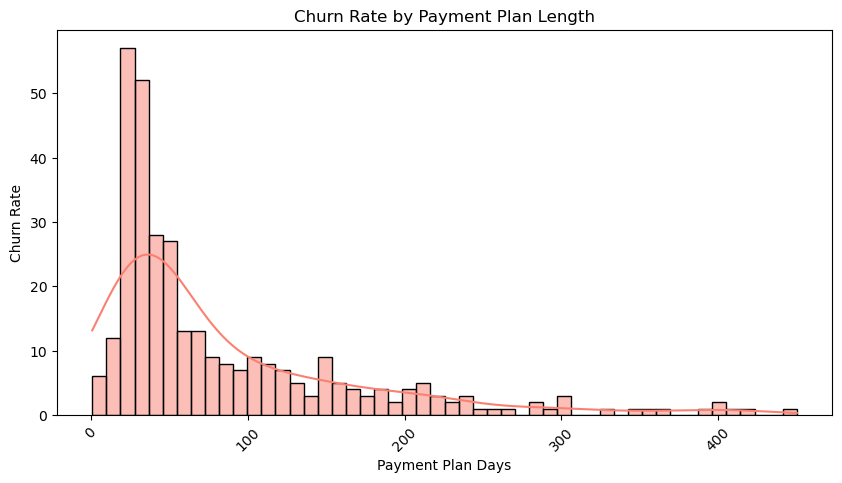

In [209]:
plt.figure(figsize=(10,5))
sns.histplot(plan_churn['payment_plan_days_mean'],bins=50,color='salmon',kde=True)
plt.title("Churn Rate by Payment Plan Length")
plt.xlabel("Payment Plan Days")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.show()

#### 0–100 days: churn rate increases — maybe short-term subscribers experiment or drop off quickly.
#### Above 100 days: churn rate decreases — long-term subscribers are more committed.
#### The density of users decreases as plan length increases (fewer users in long-term plans).

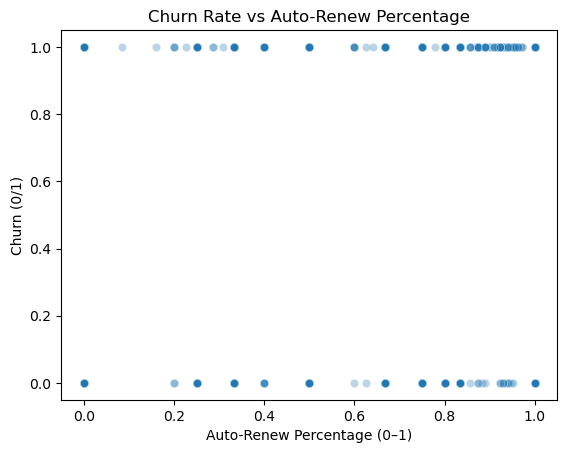

In [211]:
sns.scatterplot(
    data=user_main_members,
    x='is_auto_renew_mean',
    y='is_churn',
    alpha=0.3
)
plt.title("Churn Rate vs Auto-Renew Percentage")
plt.xlabel("Auto-Renew Percentage (0–1)")
plt.ylabel("Churn (0/1)")
plt.show()

In [212]:
user_main_members['payment_ratio'] = user_main_members['actual_amount_paid_sum'] / (user_main_members['plan_list_price_mean'] + 1e-6)

In [213]:
user_main_members.head()

,msno,is_churn,payment_plan_days_mean,payment_plan_days_max,plan_list_price_mean,actual_amount_paid_sum,is_auto_renew_mean,is_cancel_mean,date,num_25,...,num_985,num_100,num_unq,total_secs,city,bd,gender,registered_via,registration_init_time,payment_ratio
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,30.0,30,180.0,180,0.0,0.000,6,0,...,0,26,30,6986.509,13,20,male,3,2013-12-23,1.0
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,75.0,90,150.0,300,0.0,0.000,20,239,...,22,205,432,67810.467,13,18,male,3,2013-12-27,2.0
2,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,30.0,30,99.0,792,1.0,0.125,15,9,...,4,962,548,239882.241,13,35,female,7,2014-01-25,8.0
3,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,30.0,30,149.0,149,1.0,1.000,4,6,...,4,37,48,10110.665,22,0,NaN,3,2014-01-26,1.0
4,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,410.0,410,1788.0,1788,0.0,0.000,31,78,...,16,1023,758,290831.795,9,28,female,3,2014-02-02,1.0


In [214]:
user_main_members['payment_ratio'].describe()

count    725722.000000
mean          1.220456
std           1.215214
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          77.999989
Name: payment_ratio, dtype: float64

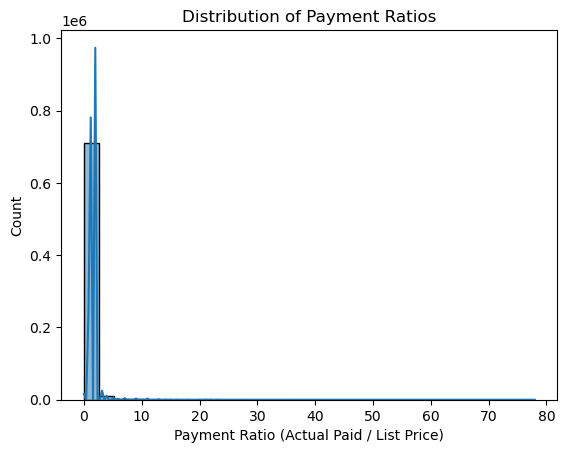

In [215]:
sns.histplot(user_main_members['payment_ratio'], bins=30, kde=True)
plt.title("Distribution of Payment Ratios")
plt.xlabel("Payment Ratio (Actual Paid / List Price)")
plt.ylabel("Count")
plt.show()

In [216]:
activity_cols = ['num_25','num_50','num_75','num_985','num_100','num_unq','total_secs']

In [217]:
activity_comparison = user_main_members.groupby('is_churn')[activity_cols].mean().T.rename(columns={0:'Non-churners',1:'Churners'})

In [218]:
print(activity_comparison)

is_churn     Non-churners       Churners
num_25         109.347672     125.207068
num_50          26.355489      30.541639
num_75          16.648452      18.914169
num_985         18.864716      21.041907
num_100        542.657026     587.226252
num_unq        516.787576     573.695148
total_secs  141495.999618  153375.014484


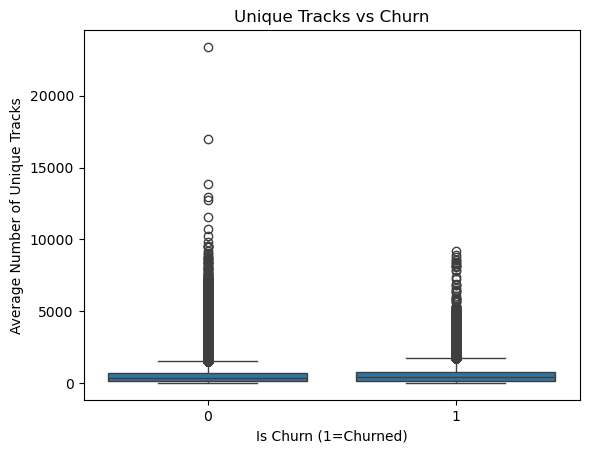

In [219]:
sns.boxplot(data=user_main_members, x='is_churn', y='num_unq')
plt.title("Unique Tracks vs Churn")
plt.xlabel("Is Churn (1=Churned)")
plt.ylabel("Average Number of Unique Tracks")
plt.show()

In [220]:
user_main_members['gender'].value_counts(dropna=False)

gender
NaN       381807
male      179846
female    164069
Name: count, dtype: int64

In [221]:
user_main_members['gender'] = user_main_members['gender'].fillna('Unknown')

In [222]:
gender_churn = (user_main_members.groupby('gender')['is_churn'].mean().reset_index().sort_values('is_churn', ascending=False))

In [223]:
gender_churn

,gender,is_churn
1,female,0.090267
2,male,0.087314
0,Unknown,0.042142


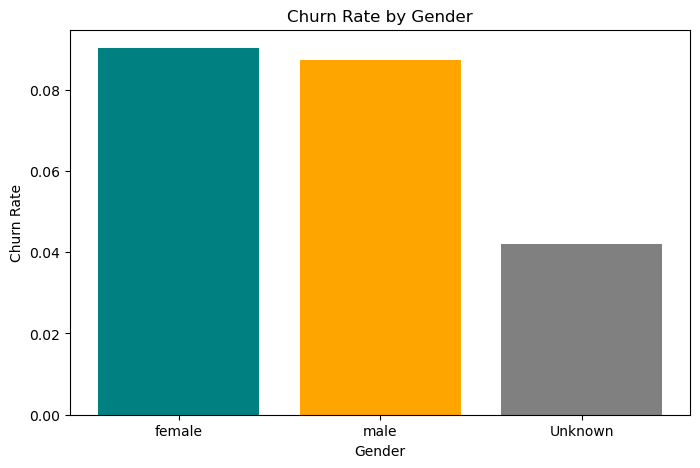

In [224]:
plt.figure(figsize=(8,5))
plt.bar(gender_churn['gender'], gender_churn['is_churn'], color=['teal','orange','gray'])
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Churn Rate")
plt.show()

In [225]:
reg_channel = (
    user_main_members.groupby('registered_via')['is_churn']
    .mean()
    .reset_index()
    .sort_values('is_churn', ascending=False)
)

In [226]:
reg_channel

,registered_via,is_churn
1,4,0.144795
0,3,0.111047
3,9,0.089564
4,13,0.068489
2,7,0.029747


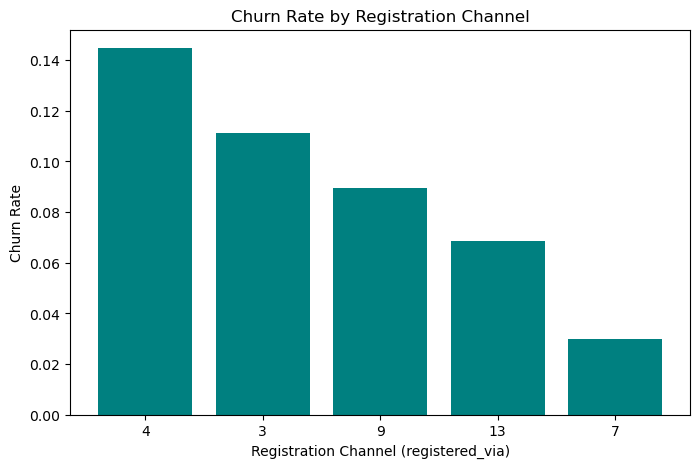

In [227]:
plt.figure(figsize=(8,5))
plt.bar(reg_channel['registered_via'].astype(str), reg_channel['is_churn'], color='teal')
plt.title("Churn Rate by Registration Channel")
plt.xlabel("Registration Channel (registered_via)")
plt.ylabel("Churn Rate")
plt.show()

In [268]:
user_main_members['cancel_bin'] = pd.cut(
    user_main_members['is_cancel_mean'],
    bins=[0, 0.2, 0.5, 0.8, 1.0],
    labels=['0–20%', '20–50%', '50–80%', '80–100%'],
    include_lowest=True
)

In [270]:
cancel_churn = (
    user_main_members.groupby('cancel_bin')['is_churn']
    .mean()
    .reset_index()
)

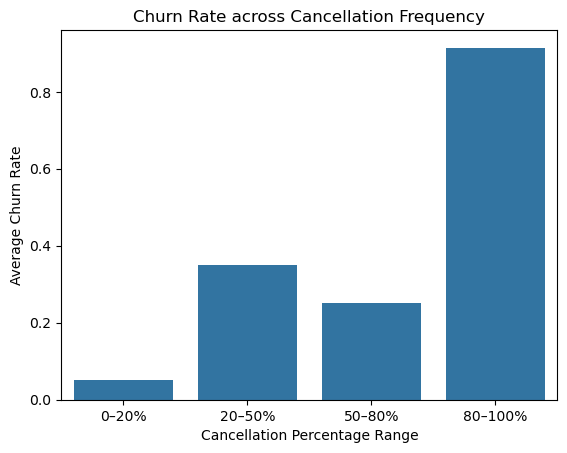

In [271]:
sns.barplot(x='cancel_bin', y='is_churn', data=cancel_churn)
plt.title("Churn Rate across Cancellation Frequency")
plt.xlabel("Cancellation Percentage Range")
plt.ylabel("Average Churn Rate")
plt.show()

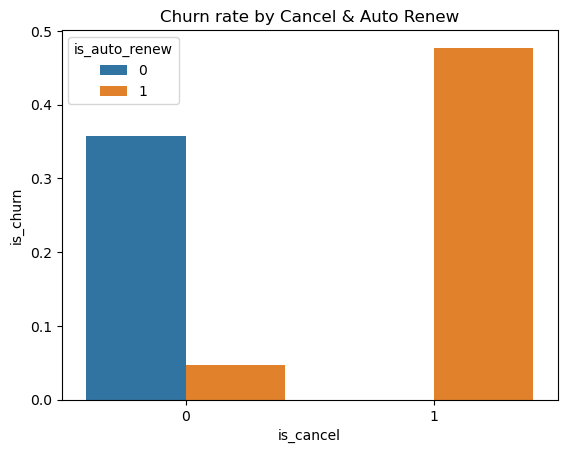

In [235]:
sns.barplot(data=cancel_auto, x='is_cancel', y='is_churn', hue='is_auto_renew')
plt.title('Churn rate by Cancel & Auto Renew')
plt.show()

In [236]:
user_main_members.columns

Index(['msno', 'is_churn', 'payment_plan_days_mean', 'payment_plan_days_max',
       'plan_list_price_mean', 'actual_amount_paid_sum', 'is_auto_renew_mean',
       'is_cancel_mean', 'date', 'num_25', 'num_50', 'num_75', 'num_985',
       'num_100', 'num_unq', 'total_secs', 'city', 'bd', 'gender',
       'registered_via', 'registration_init_time', 'payment_ratio',
       'cancel_bin'],
      dtype='object')

In [244]:
selected_cols = ['payment_ratio','num_25','num_50','num_75','num_985','num_100','num_unq','total_secs','is_cancel_mean','is_auto_renew_mean','is_churn']

In [237]:
def churn_correlation(df, features, target='is_churn'):
    corr_df = df[features].copy()
    
    corr_matrix = corr_df.corr()
    
    churn_corr = corr_matrix[[target]].drop(target).sort_values(by=target, key=abs, ascending=False)
    
    print("Top correlated features with churn:\n")
    print(churn_corr)
    
    # Plot as heatmap
    plt.figure(figsize=(6, len(churn_corr)*0.5 + 2))
    sns.heatmap(churn_corr, annot=True, cmap='coolwarm', center=0)
    plt.title(f"Feature Correlations with {target}")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Feature")
    plt.show()

Top correlated features with churn:

                    is_churn
is_cancel_mean      0.361799
is_auto_renew_mean -0.347661
payment_ratio       0.095802
num_50              0.026329
num_75              0.024600
num_unq             0.023274
num_25              0.021524
total_secs          0.015547
num_100             0.014161
num_985             0.012619


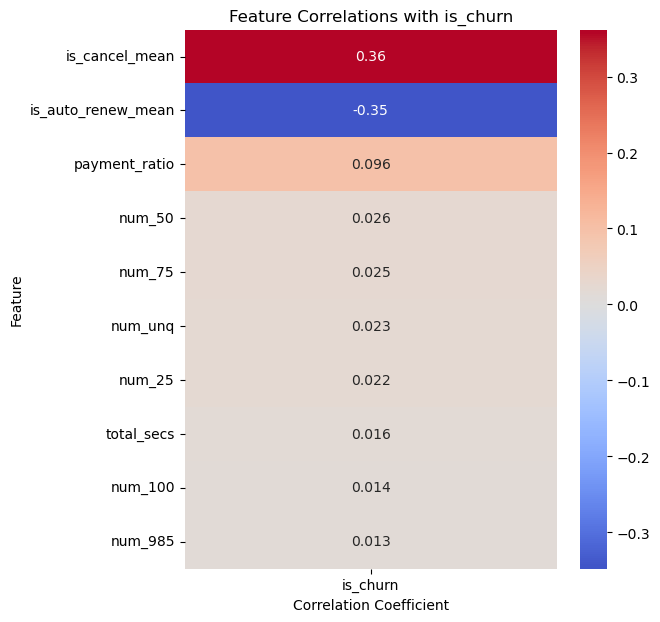

In [245]:
churn_correlation(user_main_members,selected_cols)

### Overall report analysis 
#### The dataset is highly imbalanced, indicating a much larger proportion of non-churned customers compared to churned ones.

### Subscription and Pricing Patterns
#### The most commonly purchased plans are 30-day subscriptions, suggesting short-term commitment cycles.
#### The majority of plan prices fall within the range of ₹149–₹250, with very few free-trial or discounted customers.
#### Discounts tend to attract short-term users with low lifetime value, whereas full-price subscribers demonstrate higher loyalty

### Subscription and Pricing Patterns
#### The most commonly purchased plans are 30-day subscriptions, suggesting short-term commitment cycles.
#### The majority of plan prices fall within the range of ₹149–₹250, with very few free-trial or discounted customers.
#### Discounts tend to attract short-term users with low lifetime value, whereas full-price subscribers demonstrate higher loyalty.

### Payment and Renewal Behavior
#### The most frequently used payment methods are coded as 41, 39, and 36, indicating preferred transaction modes.
#### Around 796,865 users have auto-renew enabled, highlighting a strong customer base that prefers recurring billing.
#### Customers with auto-renew enabled show significantly lower churn rates, confirming its effectiveness in retaining users.

### Temporal Patterns
#### Day 30 shows the lowest churn, likely due to ongoing short-term plans or renewals.
#### Churn rate increases as tenure (number of days since subscription) increases, implying that customer engagement or value perception may drop over time.

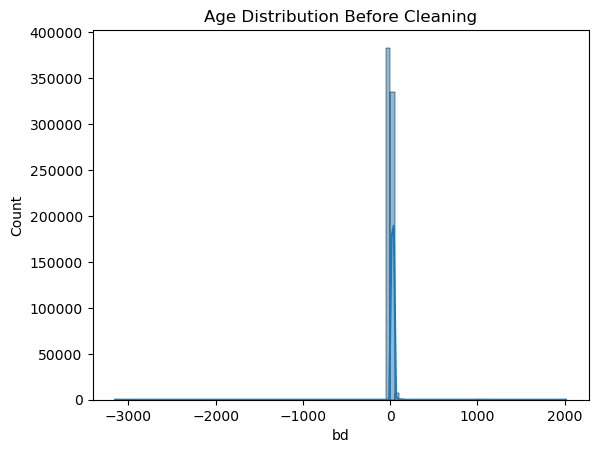

In [246]:
sns.histplot(user_main_members['bd'], bins=100, kde=True)
plt.title("Age Distribution Before Cleaning")
plt.show()

In [247]:
user_main_members['bd'] = user_main_members['bd'].abs()

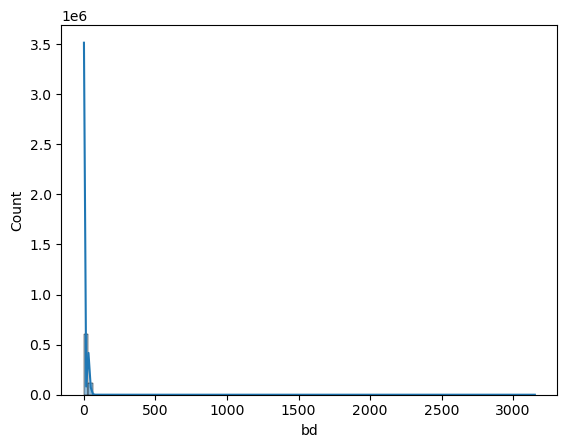

In [248]:
sns.histplot(user_main_members['bd'], bins=100, kde=True)
plt.show()

In [249]:
user_main_members['bd'] = user_main_members['bd'].apply(lambda x:np.nan if x < 13 or x > 60 else x)

In [250]:
user_main_members['bd'].describe()

count    340203.000000
mean         29.607605
std           8.270244
min          13.000000
25%          24.000000
50%          28.000000
75%          34.000000
max          60.000000
Name: bd, dtype: float64

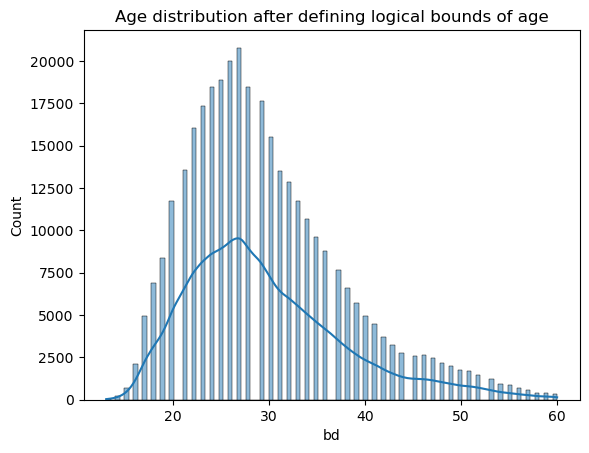

In [251]:
sns.histplot(user_main_members['bd'], bins=100, kde=True)
plt.title("Age distribution after defining logical bounds of age")
plt.show()

In [252]:
bins = [10, 20, 30, 40, 50, 60]

In [253]:
labels = ['10-19', '20-29', '30-39', '40-49', '50-59']

In [254]:
user_main_members['age_bin'] = pd.cut(user_main_members['bd'],bins=bins,labels=labels)

In [255]:
most_freq_bin = user_main_members['age_bin'].mode()[0]

In [256]:
most_freq_bin

'20-29'

In [257]:
user_main_members['age_bin'] = user_main_members['age_bin'].fillna(most_freq_bin)

In [258]:
user_main_members['age_bin'].isnull().sum()

np.int64(0)

In [259]:
print(user_main_members['age_bin'].value_counts())

age_bin
20-29    562180
30-39     92106
10-19     35067
40-49     27749
50-59      8620
Name: count, dtype: int64


In [273]:
df = user_main_members.copy()

In [274]:
df.drop('bd',axis=1,inplace=True)

In [275]:
df.isnull().sum()

msno                      0
is_churn                  0
payment_plan_days_mean    0
payment_plan_days_max     0
plan_list_price_mean      0
actual_amount_paid_sum    0
is_auto_renew_mean        0
is_cancel_mean            0
date                      0
num_25                    0
num_50                    0
num_75                    0
num_985                   0
num_100                   0
num_unq                   0
total_secs                0
city                      0
gender                    0
registered_via            0
registration_init_time    0
payment_ratio             0
age_bin                   0
cancel_bin                0
dtype: int64

In [278]:
df.head()

,msno,is_churn,payment_plan_days_mean,payment_plan_days_max,plan_list_price_mean,actual_amount_paid_sum,is_auto_renew_mean,is_cancel_mean,date,num_25,...,num_100,num_unq,total_secs,city,gender,registered_via,registration_init_time,payment_ratio,age_bin,cancel_bin
0,f/NmvEzHfhINFEYZTR05prUdr+E+3+oewvweYz9cCQE=,1,30.0,30,180.0,180,0.0,0.000,6,0,...,26,30,6986.509,13,male,3,2013-12-23,1.0,10-19,0–20%
1,zLo9f73nGGT1p21ltZC3ChiRnAVvgibMyazbCxvWPcg=,1,75.0,90,150.0,300,0.0,0.000,20,239,...,205,432,67810.467,13,male,3,2013-12-27,2.0,10-19,0–20%
2,K6fja4+jmoZ5xG6BypqX80Uw/XKpMgrEMdG2edFOxnA=,1,30.0,30,99.0,792,1.0,0.125,15,9,...,962,548,239882.241,13,female,7,2014-01-25,8.0,30-39,0–20%
3,ibIHVYBqxGwrSExE63/omeDD99M5vYB3CN2HzkEY+eM=,1,30.0,30,149.0,149,1.0,1.000,4,6,...,37,48,10110.665,22,Unknown,3,2014-01-26,1.0,20-29,80–100%
4,moRTKhKIDvb+C8ZHOgmaF4dXMLk0jOn65d7a8tQ2Eds=,1,410.0,410,1788.0,1788,0.0,0.000,31,78,...,1023,758,290831.795,9,female,3,2014-02-02,1.0,20-29,0–20%
